<a href="https://colab.research.google.com/github/gtistiani/our-activity/blob/main/datasetnew_intern_yolov8_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Jan 16 21:25:57 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
# #Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## Menyiapkan Dataset Khusus


In [5]:
!mkdir '{HOME}/datasets'
DATA_DIR='/content/datasets'

### Download Dataset


In [6]:
pip install gdown==4.6.0

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [7]:
!gdown 1dYrYcgmn6tD1rY1Jr_qqb9C2EYRkpRdg -O dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1dYrYcgmn6tD1rY1Jr_qqb9C2EYRkpRdg
To: /content/dataset.zip
100% 191M/191M [00:06<00:00, 30.9MB/s]


In [8]:
!unzip "dataset.zip" -d "datasets"

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: datasets/train/septoria_leaf_spot/Slf939.jpg  
  inflating: datasets/train/septoria_leaf_spot/Slf940.jpg  
  inflating: datasets/train/septoria_leaf_spot/Slf941.jpg  
  inflating: datasets/train/septoria_leaf_spot/Slf942.jpg  
  inflating: datasets/train/septoria_leaf_spot/Slf943.jpg  
  inflating: datasets/train/septoria_leaf_spot/Slf944.jpg  
  inflating: datasets/train/septoria_leaf_spot/Slf945.jpg  
  inflating: datasets/train/septoria_leaf_spot/Slf946.jpg  
  inflating: datasets/train/septoria_leaf_spot/Slf947.jpg  
  inflating: datasets/train/septoria_leaf_spot/Slf948.jpg  
  inflating: datasets/train/septoria_leaf_spot/Slf949.jpg  
  inflating: datasets/train/septoria_leaf_spot/Slf950.jpg  
  inflating: datasets/train/septoria_leaf_spot/Slf951.jpg  
  inflating: datasets/train/septoria_leaf_spot/Slf952.jpg  
  inflating: datasets/train/septoria_leaf_spot/Slf953.jpg  
  inflating: datasets/train/septoria_leaf

## Custom Training

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
%cd {HOME}

!yolo task=classify mode=train model=yolov8m-cls.pt data='{DATA_DIR}' epochs=50 imgsz=32

/content
Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8m-cls.pt, data=/content/datasets, epochs=50, time=None, patience=50, batch=16, imgsz=32, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

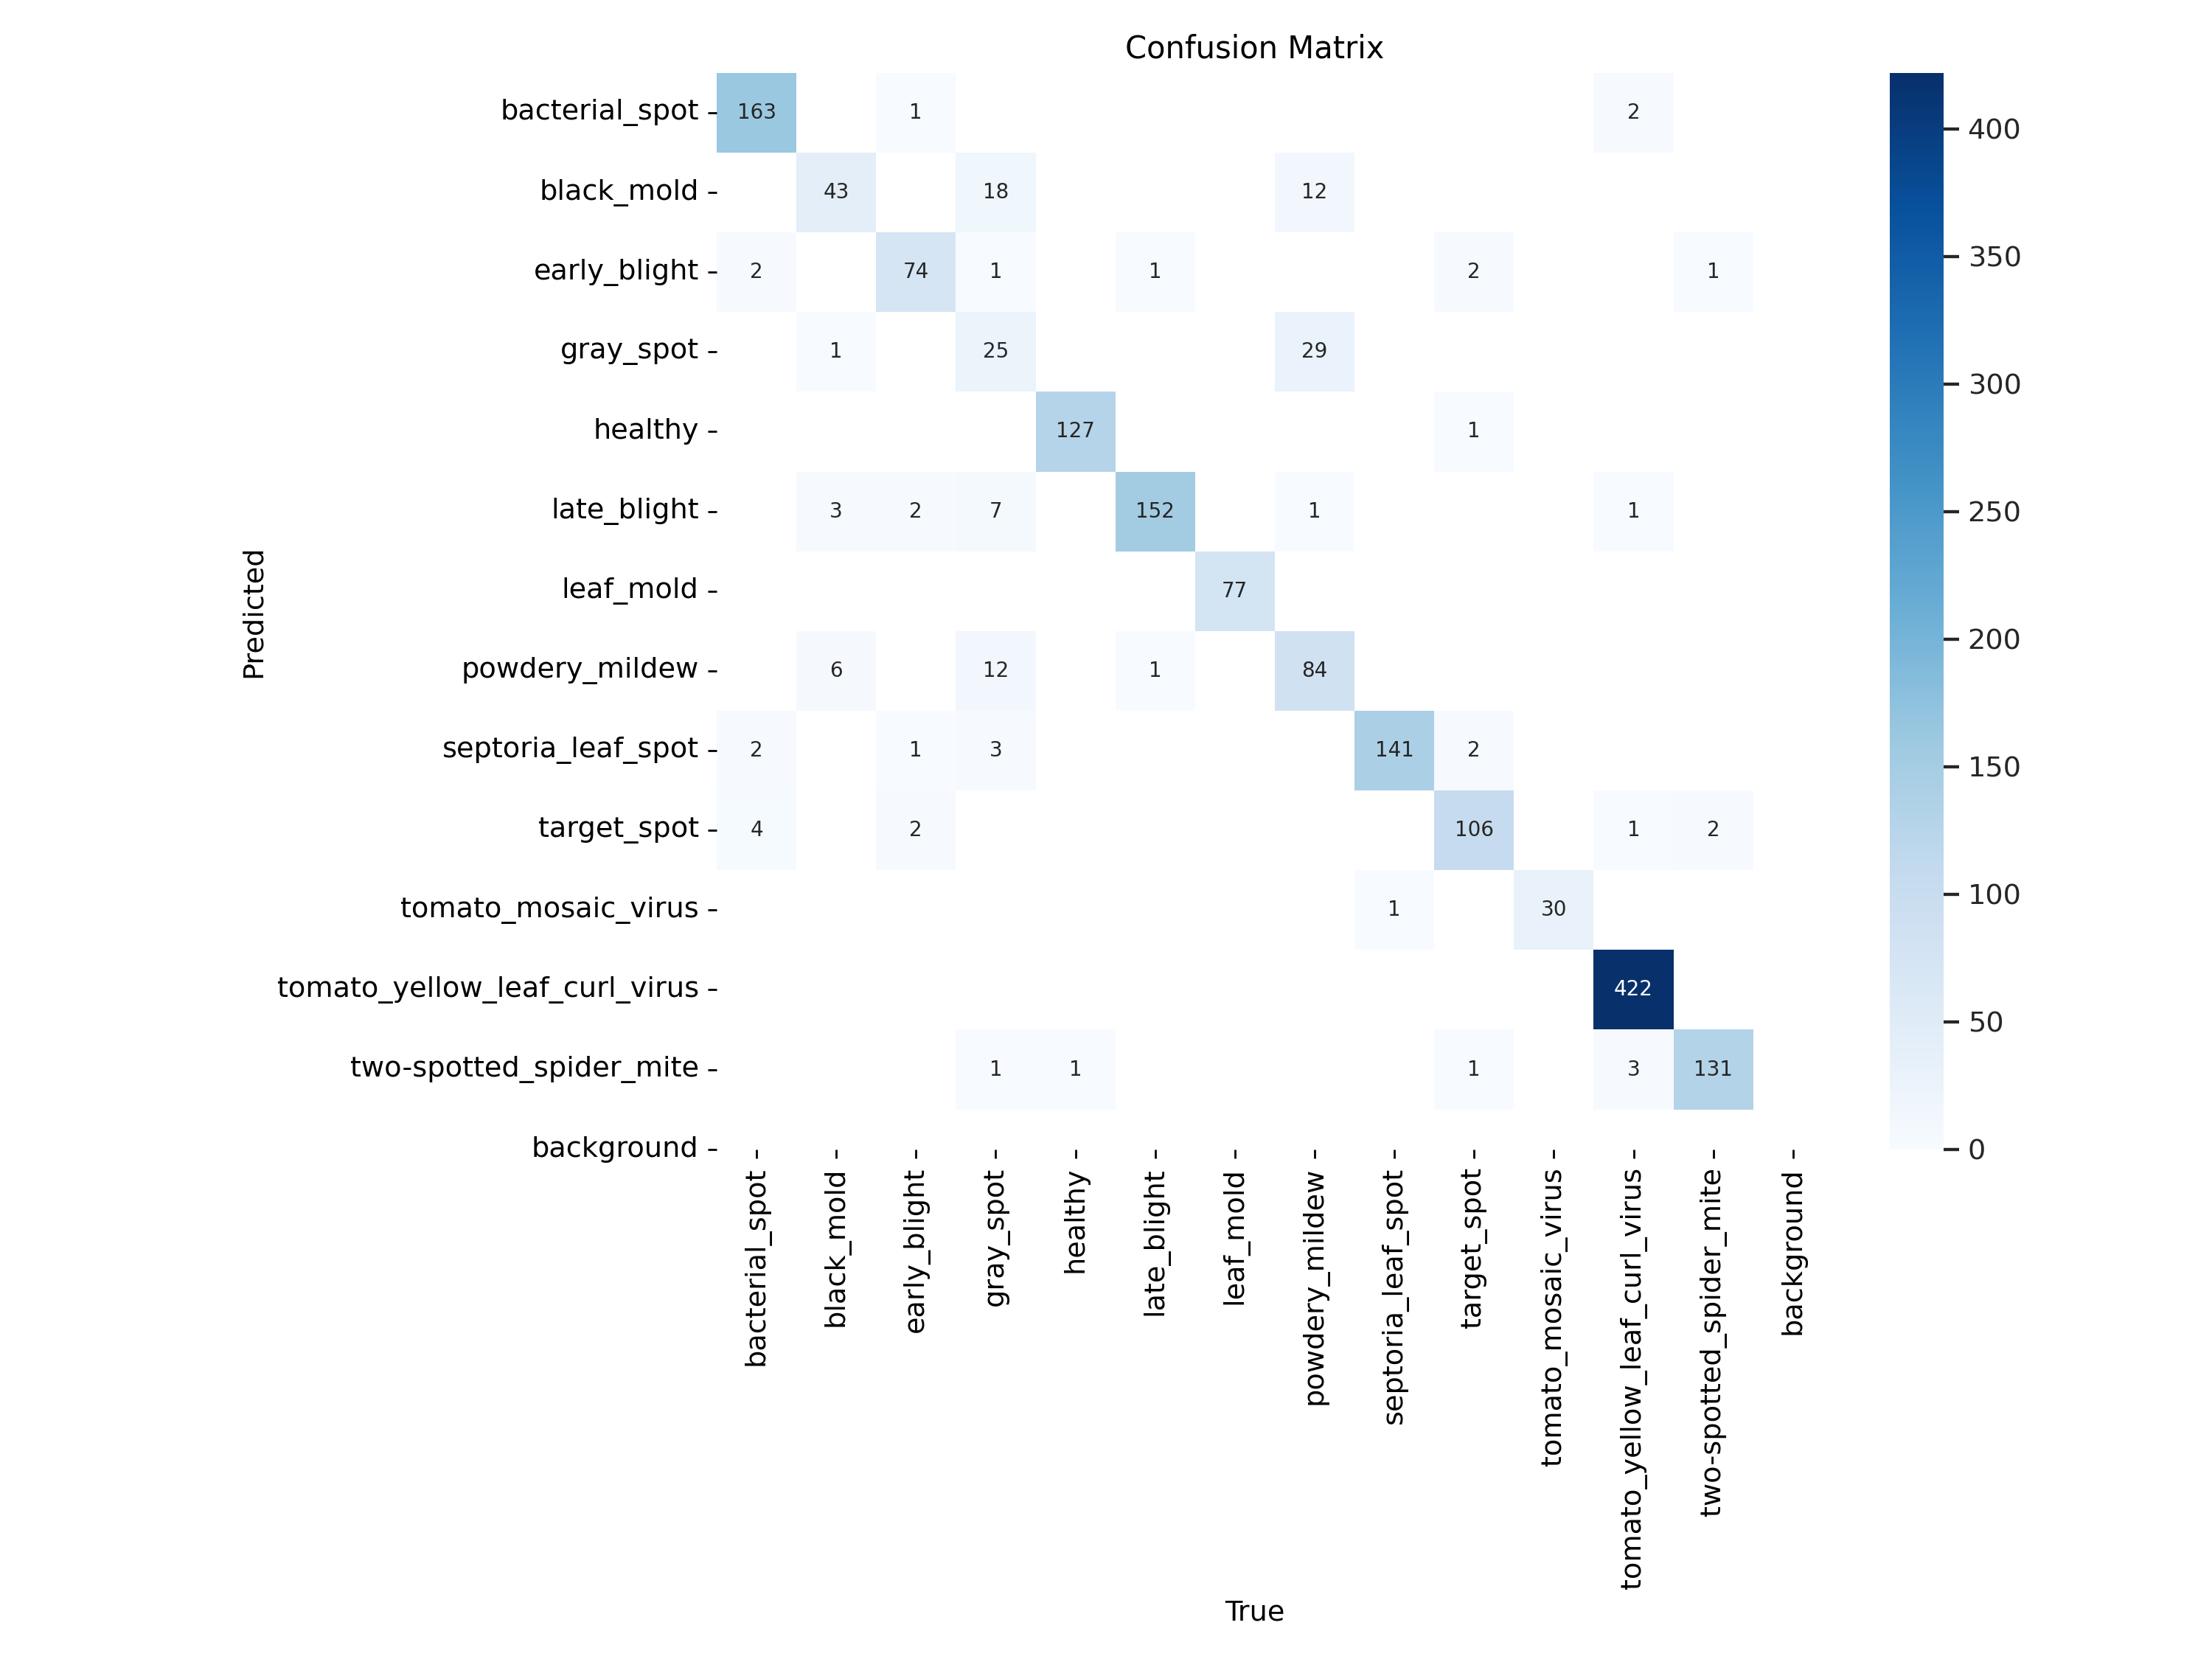

In [13]:
Image(filename=f'{HOME}/runs/classify/train2/confusion_matrix.png')

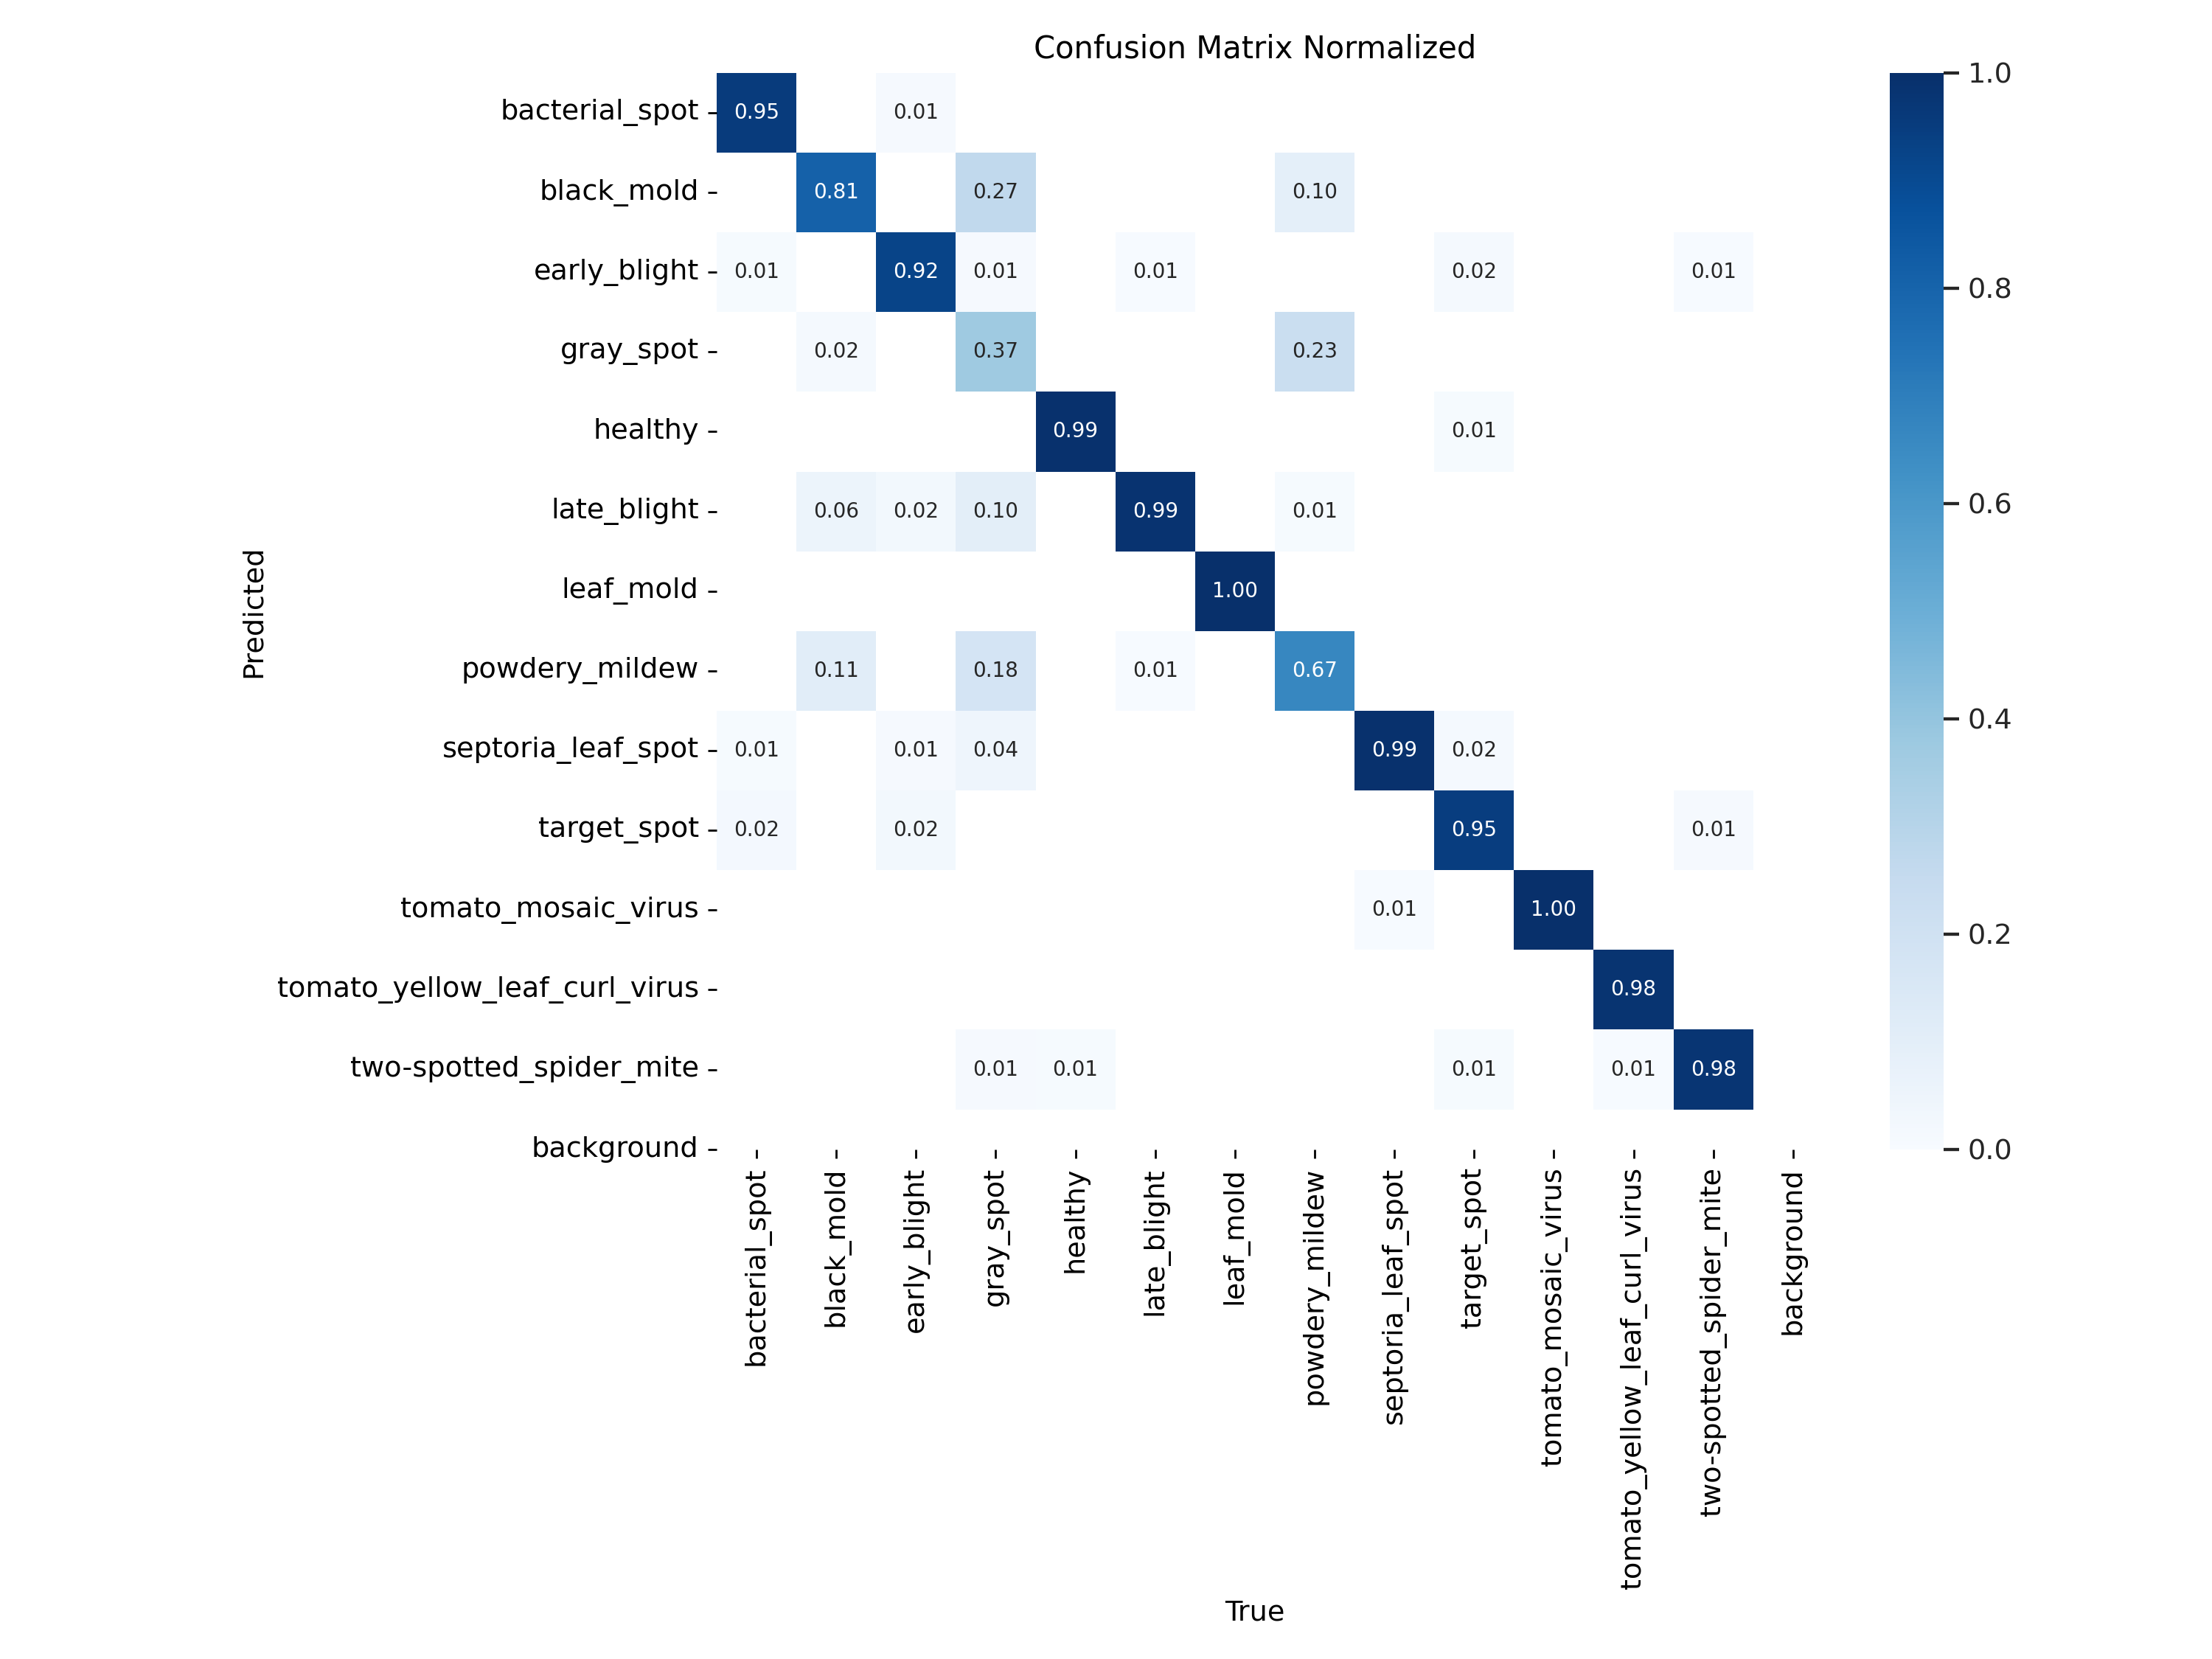

In [14]:
Image(filename=f'{HOME}/runs/classify/train2/confusion_matrix_normalized.png')

#Predict

In [25]:
model = YOLO('./runs/classify/train2/weights/best.pt')  # load a custom model
results = model('./datasets/train/bacterial_spot/Bs1288.jpg')  # predict on an image
# results = model('./datasets/train/healthy/H1043.jpg')  # predict on an image
# results = model('./datasets/train/early_blight/Eb259.jpg')  # predict on an image
print (results)


image 1/1 /content/datasets/train/bacterial_spot/Bs1288.jpg: 32x32 bacterial_spot 1.00, early_blight 0.00, late_blight 0.00, septoria_leaf_spot 0.00, black_mold 0.00, 6.4ms
Speed: 2.2ms preprocess, 6.4ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)
[ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: None
names: {0: 'bacterial_spot', 1: 'black_mold', 2: 'early_blight', 3: 'gray_spot', 4: 'healthy', 5: 'late_blight', 6: 'leaf_mold', 7: 'powdery_mildew', 8: 'septoria_leaf_spot', 9: 'target_spot', 10: 'tomato_mosaic_virus', 11: 'tomato_yellow_leaf_curl_virus', 12: 'two-spotted_spider_mite'}
obb: None
orig_img: array([[[148, 151, 156],
        [164, 167, 172],
        [170, 173, 178],
        ...,
        [125, 124, 134],
        [130, 129, 139],
        [131, 130, 140]],

       [[152, 155, 160],
        [158, 161, 166],
        [155, 158, 163],
        ...,
        [125, 124, 134],
        [128, 127, 137],
        [129, 128, 1

In [26]:
import numpy as np
names_dict = results[0].names
probs = results[0].probs.data.tolist()
print(names_dict)
print(probs)
print(names_dict[np.argmax(probs)])

{0: 'bacterial_spot', 1: 'black_mold', 2: 'early_blight', 3: 'gray_spot', 4: 'healthy', 5: 'late_blight', 6: 'leaf_mold', 7: 'powdery_mildew', 8: 'septoria_leaf_spot', 9: 'target_spot', 10: 'tomato_mosaic_virus', 11: 'tomato_yellow_leaf_curl_virus', 12: 'two-spotted_spider_mite'}
[0.9958246946334839, 4.754418841912411e-05, 0.0038457796908915043, 2.0344823496998288e-05, 1.2126854471716797e-06, 0.00011975163943134248, 1.1264854038017802e-05, 2.7551204766496085e-05, 6.53795650578104e-05, 1.1259032362431753e-05, 1.0873473854644544e-07, 3.107457359874388e-06, 2.1990090317558497e-05]
bacterial_spot


# Plot Metrics

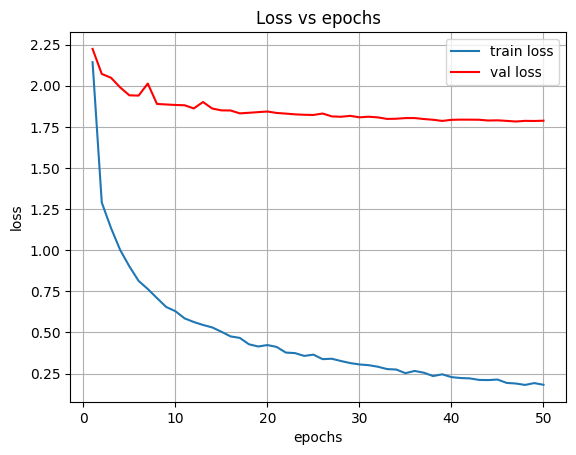

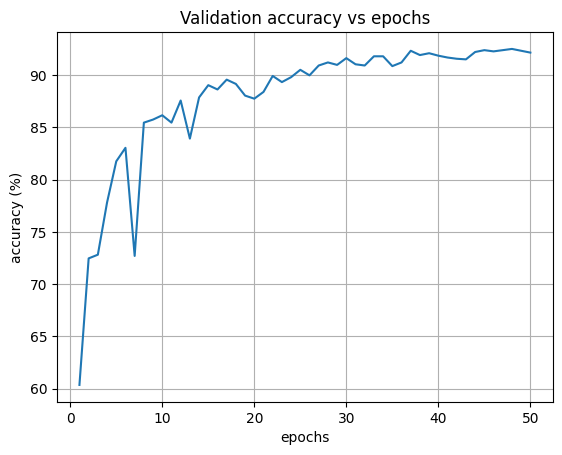

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

results_path = './runs/classify/train2/results.csv'

results = pd.read_csv(results_path)

plt.figure()
plt.plot(results['                  epoch'], results['             train/loss'], label='train loss')
plt.plot(results['                  epoch'], results['               val/loss'], label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()


plt.figure()
plt.plot(results['                  epoch'], results['  metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')

plt.show()

In [28]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/classify/predict/*.jpg')[:10]:
      display(Image(filename=image_path, height=600))
      print("\n")

## Export Model

In [30]:
!yolo export model={HOME}/runs/classify/train2/weights/best.pt format=onnx

Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.00GHz)
YOLOv8m-cls summary (fused): 103 layers, 15779309 parameters, 0 gradients, 41.6 GFLOPs

PyTorch: starting from '/content/runs/classify/train2/weights/best.pt' with input shape (1, 3, 32, 32) BCHW and output shape(s) (1, 13) (30.2 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 105.0 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 9.5s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 10.4s, saved as '/content/runs/classify/train2/weights/best.onnx' (60.2 MB)

Export complete (12.1s)
Results saved to /content/runs/classify/train2/weights
Predict:         yolo predict task=classify model=/content/runs/classify/train2/weights/best.onnx imgsz=32  
Validate:   

### Download Model

In [31]:
from google.colab import files
files.download('/content/runs/classify/train2/weights/best.onnx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>